# **Работа № 6**. Байесовская линейная регрессия на примере с данными о домах в Калифорнии
Введение в байесовскую линейную регрессию

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## Предобработка данных

In [ ]:
data = fetch_california_housing(as_frame=True).frame
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Проверка на дубликаты

data.duplicated().sum()

0

Пропуски и дубли отсутствуют, посмотрим на распределения значений колонок

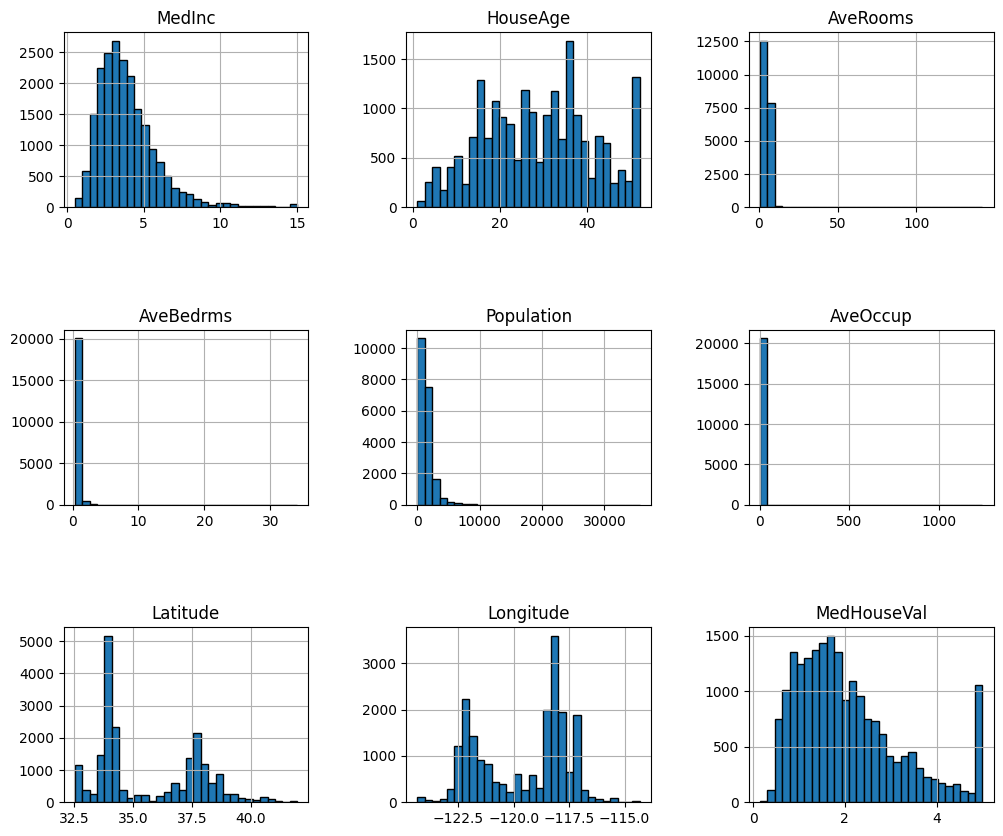

In [ ]:
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
# Посмотрим на целевую колонку для прогноза

fetch_california_housing(as_frame=True).target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
# Разделение данных на обучающий и тестовый наборы
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создание и обучение модели Ridge регрессии, alpha - параметр регуляризации
alpha = 1.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

In [ ]:
# Предсказание на тестовых данных

y_pred = ridge.predict(X_test)

In [ ]:
# Оценка качества модели

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.5558034669932211


In [ ]:
# Подсчет MSE для разных alpha

alphas = [0.01, 0.1, 1, 10, 100]
mse_values = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))

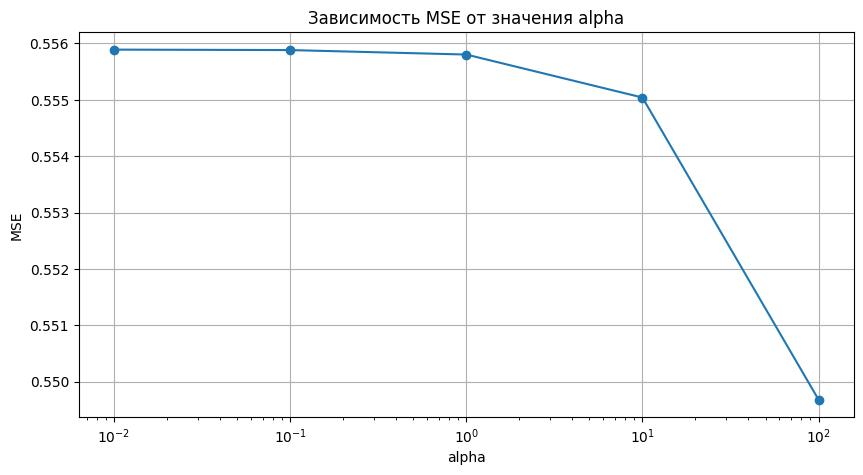

In [ ]:
# Визуализация зависимости MSE от значений параметра регуляризации

plt.figure(figsize=(10, 5))
plt.plot(alphas, mse_values, marker='o')
plt.title('Зависимость MSE от значения alpha')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.xscale('log')  # Используем логарифмическую шкалу для alpha
plt.grid()
plt.show()